<a href="https://colab.research.google.com/github/TEJSINGH17/USD-MS-AAI_501_GRP8/blob/main/v2Group8_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df1 = pd.read_csv('/content/stock_tweets.csv')
print(df1.head())
print(df1.tail())

                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.  
                            Date  \
80788  2021-10-07 17:11:57+00:00   
80789  2021-10-04 17:05:59+00:00   
80790  2021-10-01 04:43:41+00:00   
80791  2021-10-01 00:03:32+00:00   
80792  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
80788  Some of the fastest growing tech stock

In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df1['scores'] = df1['Tweet'].apply(lambda text: analyzer.polarity_scores(text))
df1['compound'] = df1['scores'].apply(lambda score_dict: score_dict['compound'])

# List of stocks to include
selected_stocks = ['AAPL', 'MSFT', 'AMZN', 'META', 'TSLA', 'AMD', 'INTC', 'PYPL']

# Filter the dataset for the selected stocks
filtered_df = df1[df1['Stock Name'].isin(selected_stocks)]

# Ensure the Date column is properly formatted (strip time if present)
filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).dt.date

# Group by Date and Stock Name, calculate the mean compound score
average_sentiment_by_date = (
    filtered_df.groupby(['Date', 'Stock Name'], as_index=False)['compound']
    .mean()
    .rename(columns={'compound': 'average_sentiment'})
)

# Verify no duplicates for the same stock and date
duplicates_check = average_sentiment_by_date.duplicated(subset=['Date', 'Stock Name']).sum()
print(f"Number of duplicate rows: {duplicates_check}")

# Display the result
print("Average sentiment scores by date for the selected stocks:")
print(average_sentiment_by_date)

# Example: Filter results for TSLA
stock_name = 'TSLA'
tsla_sentiment = average_sentiment_by_date[average_sentiment_by_date['Stock Name'] == stock_name]
print(f"\nAverage sentiment scores for {stock_name} by date:")
print(tsla_sentiment)



Number of duplicate rows: 0
Average sentiment scores by date for the selected stocks:
            Date Stock Name  average_sentiment
0     2021-09-30       AAPL           0.098900
1     2021-09-30        AMD           0.384217
2     2021-09-30       AMZN           0.256980
3     2021-09-30       META           0.472467
4     2021-09-30       MSFT           0.256980
...          ...        ...                ...
2552  2022-09-29       INTC          -0.827100
2553  2022-09-29       META          -0.051600
2554  2022-09-29       MSFT           0.086080
2555  2022-09-29       PYPL           0.630000
2556  2022-09-29       TSLA           0.057709

[2557 rows x 3 columns]

Average sentiment scores for TSLA by date:
            Date Stock Name  average_sentiment
5     2021-09-30       TSLA           0.251634
11    2021-10-01       TSLA           0.222412
17    2021-10-02       TSLA           0.307714
23    2021-10-03       TSLA           0.267680
30    2021-10-04       TSLA           0.151775

<ipython-input-7-b717a7f572dc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date']).dt.date


In [9]:
# Sort the DataFrame by Stock Name and then by Date
average_sentiment_by_date_sorted = average_sentiment_by_date.sort_values(by=['Stock Name', 'Date'])

# Save to CSV
output_file = "average_sentiment_by_date_sorted.csv"  # Update with your desired file path
average_sentiment_by_date_sorted.to_csv(output_file, index=False)

print(f"Output saved to: {output_file}")



Output saved to: average_sentiment_by_date_sorted.csv


In [11]:
df4 = pd.read_csv('/content/average_sentiment_by_date_sorted.csv')
df4.head()

,Date,Stock Name,average_sentiment
0,2021-09-30,AAPL,0.098900
1,2021-10-01,AAPL,0.248255
2,2021-10-02,AAPL,0.007525
3,2021-10-03,AAPL,0.822500
4,2021-10-04,AAPL,0.122830


In [10]:
pd.read_csv('/content/Merged_Stock_and_Sentiment_Data.csv')

,Unnamed: 0.1,Date,Stock Name,average_sentiment,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
0,0,2021-09-30,AAPL,0.098900,0,141.138712,141.846076,138.800477,139.016617,89056700,0.0,0.0,AAPL
1,1,2021-10-01,AAPL,0.248255,1,139.409571,140.411674,136.668544,140.146408,94639600,0.0,0.0,AAPL
2,2,2021-10-04,AAPL,0.122830,2,139.272057,139.714171,135.843317,136.698044,98322000,0.0,0.0,AAPL
3,3,2021-10-05,AAPL,0.331000,3,137.041875,139.743611,136.914152,138.633438,80861100,0.0,0.0,AAPL
4,4,2021-10-06,AAPL,0.243520,4,137.022247,139.655204,135.941546,139.507843,83221100,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,1790,2022-09-23,TSLA,0.151379,1255,283.089996,284.500000,272.820007,275.329987,63748400,0.0,0.0,TSLA
1791,1791,2022-09-26,TSLA,0.114828,1256,271.829987,284.089996,270.309998,276.010010,58076900,0.0,0.0,TSLA
1792,1792,2022-09-27,TSLA,0.225460,1257,283.839996,288.670013,277.510010,282.940002,61925200,0.0,0.0,TSLA
1793,1793,2022-09-28,TSLA,0.129845,1258,283.079987,289.000000,277.570007,287.809998,54664800,0.0,0.0,TSLA


Processing stock: AAPL
Training model for stock: AAPL
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.2796 - val_loss: 0.1586
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1283 - val_loss: 0.0296
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255 - val_loss: 0.0308
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0234 - val_loss: 0.0307
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0280 - val_loss: 0.0282
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0209 - val_loss: 0.0205
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - val_loss: 0.0224
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0199 - val_loss: 0.0211
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - val_loss: 0.0194
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - val_loss: 0.0184
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0163 - val_loss: 0.0185
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - val_loss: 0.0173
Epoch 13/50

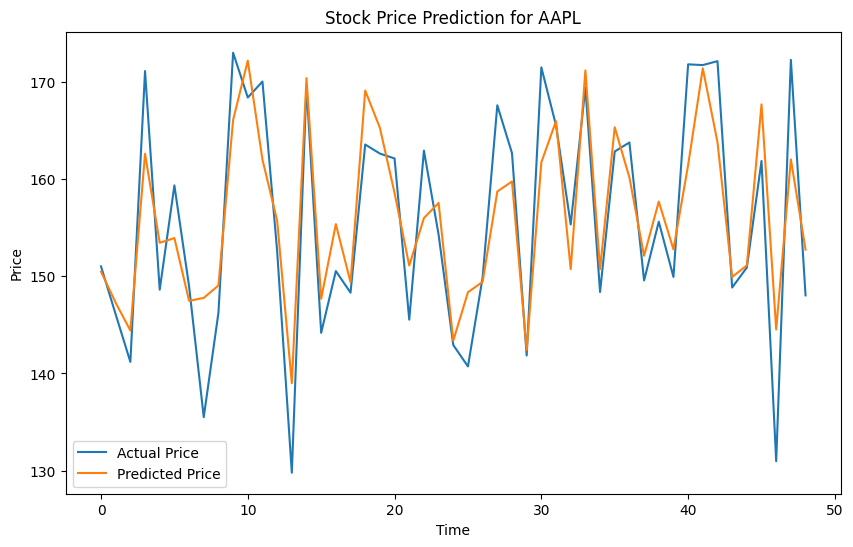

Processing stock: AMD
Training model for stock: AMD
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.2388 - val_loss: 0.1981
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1778 - val_loss: 0.1170
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0928 - val_loss: 0.0344
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0294 - val_loss: 0.0406
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0298 - val_loss: 0.0242
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0191 - val_loss: 0.0271
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0211 - val_loss: 0.0162
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0102 - val_loss: 0.0126
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0094 - val_loss: 0.0123
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - val_loss: 0.0113
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - val_loss: 0.0109
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - val_loss: 0.0121
Epoch 13/50

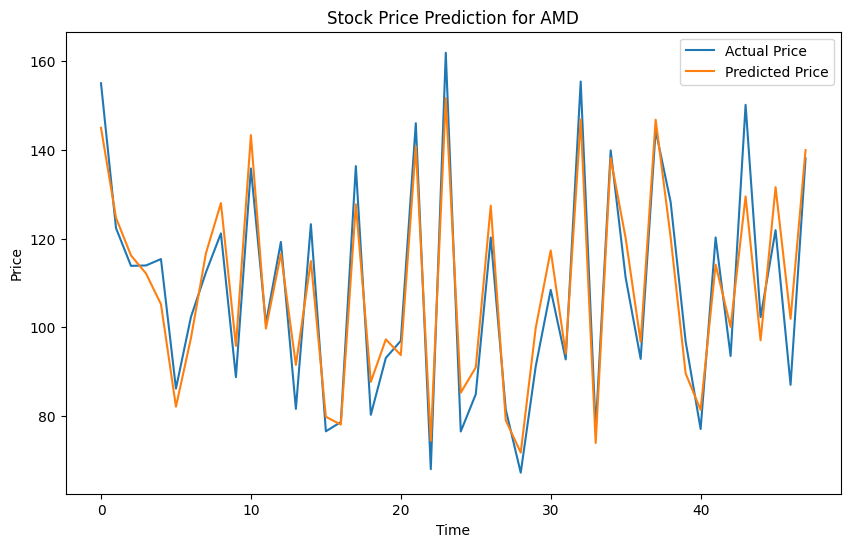

Processing stock: AMZN
Training model for stock: AMZN
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.2565 - val_loss: 0.1532
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0869 - val_loss: 0.0147
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0242 - val_loss: 0.0194
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - val_loss: 0.0204
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0177 - val_loss: 0.0182
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108 - val_loss: 0.0113
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0112 - val_loss: 0.0126
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0097 - val_loss: 0.0102
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0096 - val_loss: 0.0108
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 13/50


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step


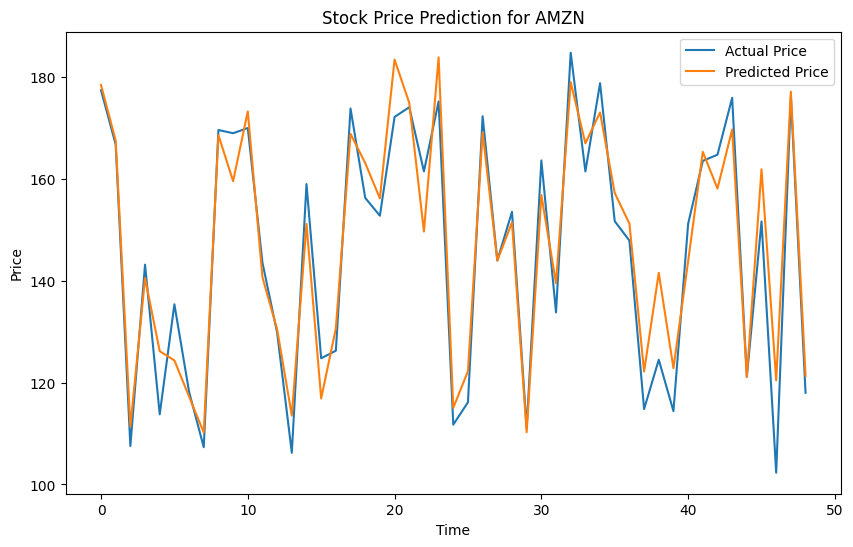

Processing stock: INTC
Training model for stock: INTC
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.3648 - val_loss: 0.3311
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2577 - val_loss: 0.2151
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1500 - val_loss: 0.1045
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0719 - val_loss: 0.0186
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0183 - val_loss: 0.0313
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0329 - val_loss: 0.0145
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0143 - val_loss: 0.0166
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0145 - val_loss: 0.0214
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0154 - val_loss: 0.0179
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125 - val_loss: 0.0115
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0083 - val_loss: 0.0117
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 13/50

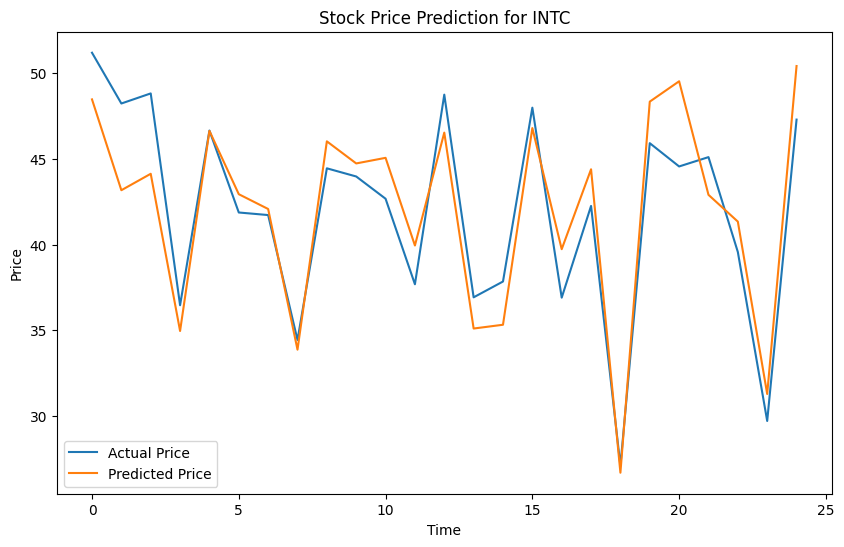

Processing stock: META
Training model for stock: META
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.3783 - val_loss: 0.2230
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2638 - val_loss: 0.1287
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1443 - val_loss: 0.0363
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0361 - val_loss: 0.0549
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0464 - val_loss: 0.0180
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0173 - val_loss: 0.0098
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - val_loss: 0.0076
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - val_loss: 0.0048
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - val_loss: 0.0042
Epoch 13/50


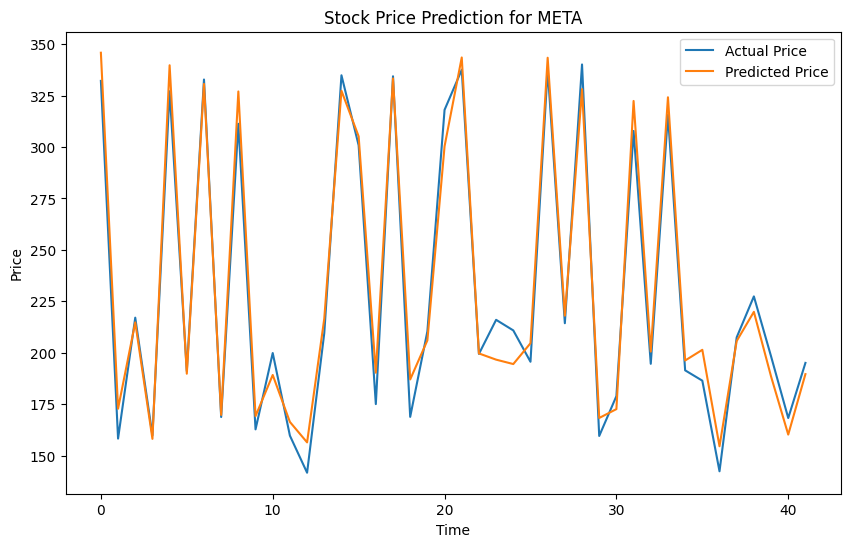

Processing stock: MSFT
Training model for stock: MSFT
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.1398 - val_loss: 0.0320
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - val_loss: 0.0273
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0225 - val_loss: 0.0234
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0166 - val_loss: 0.0169
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - val_loss: 0.0149
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - val_loss: 0.0170
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - val_loss: 0.0153
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 0.0132
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0117 - val_loss: 0.0138
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 0.0149
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110 - val_loss: 0.0129
Epoch 13/50


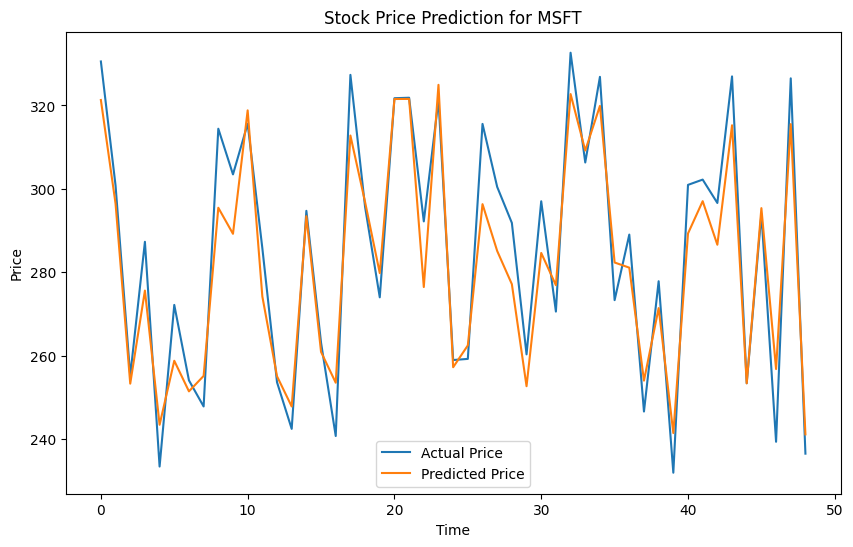

Processing stock: PYPL
Training model for stock: PYPL
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.1083 - val_loss: 0.0738
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0518 - val_loss: 0.0168
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0133 - val_loss: 0.0196
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0198 - val_loss: 0.0082
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0087 - val_loss: 0.0109
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 13/50

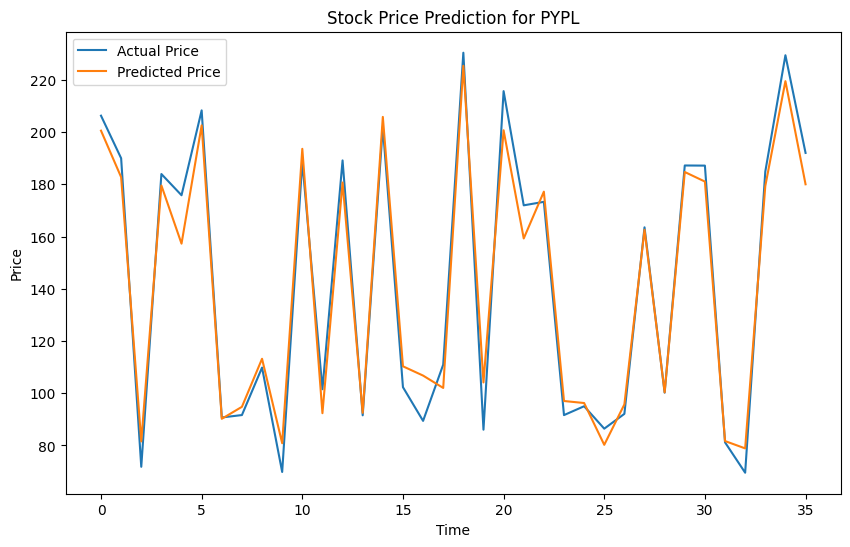

Processing stock: TSLA
Training model for stock: TSLA
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.2200 - val_loss: 0.1839
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1277 - val_loss: 0.0752
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0435 - val_loss: 0.0368
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0404 - val_loss: 0.0215
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0220 - val_loss: 0.0246
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0192 - val_loss: 0.0199
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0197 - val_loss: 0.0195
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - val_loss: 0.0190
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0198 - val_loss: 0.0189
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0173 - val_loss: 0.0193
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - val_loss: 0.0180
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0206 - val_loss: 0.0177
Epoch 13/50


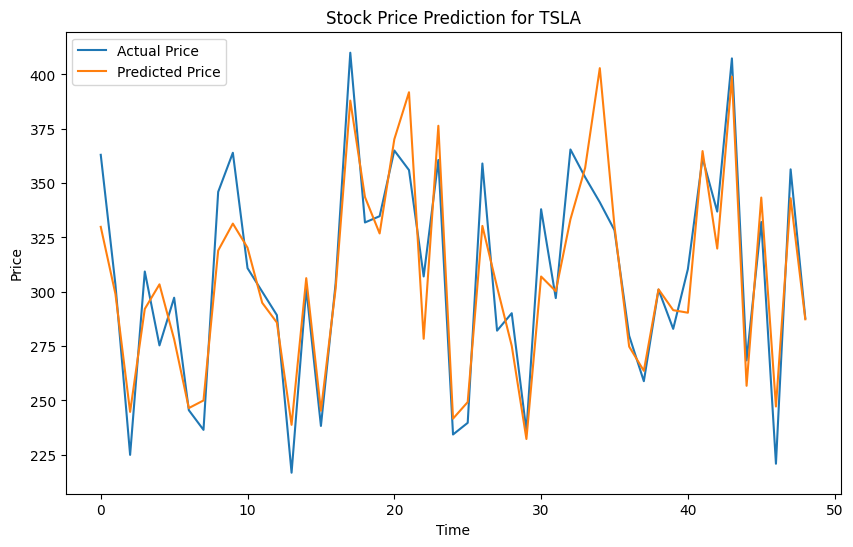

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
merged_data_path = '/content/Merged_Stock_and_Sentiment_Data.csv'
merged_df = pd.read_csv(merged_data_path)

# Clean and standardize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()

# Group by each stock (e.g., by 'symbol')
grouped_stocks = merged_df.groupby('symbol')

# Iterate through each stock group
for stock_name, stock_data in grouped_stocks:
    print(f"Processing stock: {stock_name}")

    # Filter and select relevant columns
    features = ['average_sentiment', 'open', 'high', 'low', 'volume']  # Input features
    target = 'close'  # Target variable
    stock_data = stock_data[features + [target]].dropna()

    if len(stock_data) < 20:  # Skip if there's not enough data
        print(f"Not enough data for stock {stock_name}. Skipping...")
        continue

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(stock_data)

    # Convert to DataFrame for easier handling
    normalized_df = pd.DataFrame(normalized_data, columns=features + [target])

    # Create sequences for LSTM: Define time steps
    timesteps = 10  # Number of previous days to consider for prediction
    X, y = [], []
    for i in range(timesteps, len(normalized_df)):
        X.append(normalized_df.iloc[i-timesteps:i, :-1].values)  # Features for the last `timesteps` days
        y.append(normalized_df.iloc[i, -1])  # Target value (Close price) of the current day

    # Convert to numpy arrays
    X, y = np.array(X), np.array(y)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)  # Predicting the closing price
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    print(f"Training model for stock: {stock_name}")
    history = model.fit(
        X_train, y_train,
        epochs=50,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss for {stock_name}: {loss}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse scale predictions and actual values for comparison
    y_pred_original = scaler.inverse_transform(
        np.concatenate((np.zeros((y_pred.shape[0], len(features))), y_pred), axis=1)
    )[:, -1]

    y_test_original = scaler.inverse_transform(
        np.concatenate((np.zeros((y_test.shape[0], len(features))), y_test.reshape(-1, 1)), axis=1)
    )[:, -1]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_original, label='Actual Price')
    plt.plot(y_pred_original, label='Predicted Price')
    plt.title(f'Stock Price Prediction for {stock_name}')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()


Processing stock: AAPL
Training model for stock: AAPL
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1492 - val_loss: 0.0522
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0375 - val_loss: 0.0264
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0245 - val_loss: 0.0215
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - val_loss: 0.0173
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0142 - val_loss: 0.0164
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0151
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0148
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0143
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - val_loss: 0.0162
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - val_loss: 0.0158
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - val_loss: 0.0144
Epoch 13/50
7/7 ━

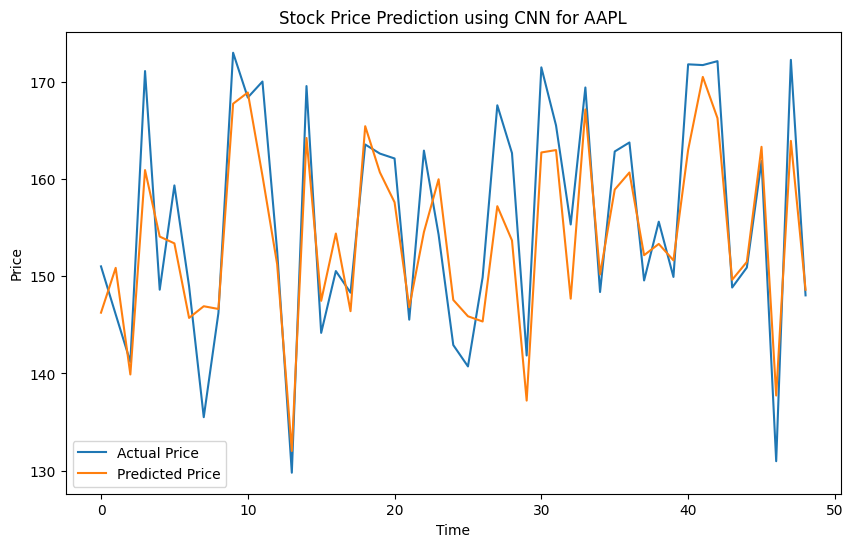

Processing stock: AMD
Training model for stock: AMD
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1505 - val_loss: 0.0664
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0498 - val_loss: 0.0169
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0231
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0121
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - val_loss: 0.0115
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071 - val_loss: 0.0104
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0090
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0085
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - val_loss: 0.0081
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0079
Epoch 13/50
6/6 ━━━

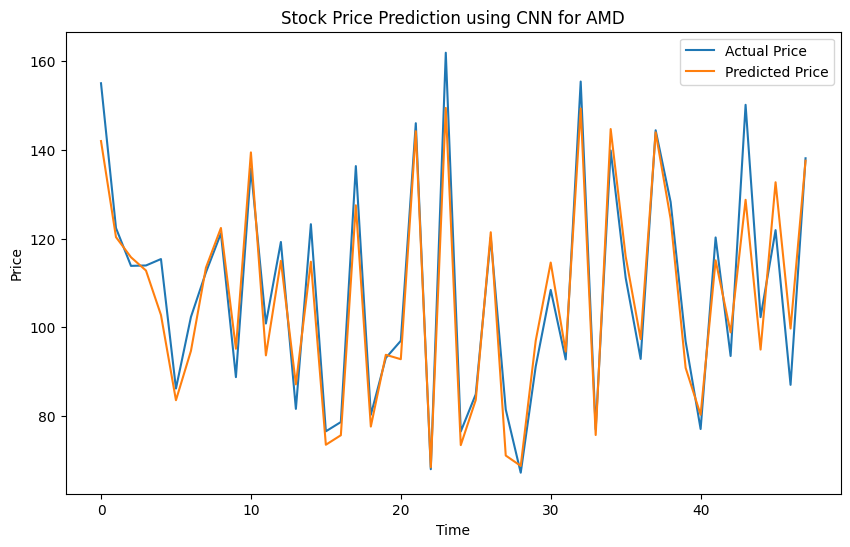

Processing stock: AMZN
Training model for stock: AMZN
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2353 - val_loss: 0.0652
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 - val_loss: 0.0107
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0246
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169 - val_loss: 0.0078
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - val_loss: 0.0097
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - val_loss: 0.0084
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - val_loss: 0.0071
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - val_loss: 0.0078
Epoch 13/50
7/7 ━━━━

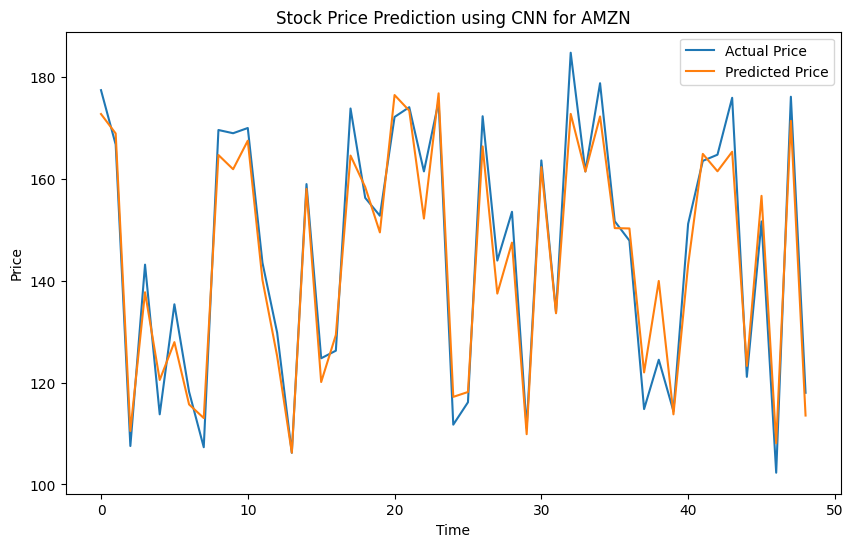

Processing stock: INTC
Training model for stock: INTC
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2815 - val_loss: 0.0268
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0269 - val_loss: 0.0426
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0509 - val_loss: 0.0175
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0181 - val_loss: 0.0186
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170 - val_loss: 0.0252
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0162 - val_loss: 0.0109
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079 - val_loss: 0.0092
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - val_loss: 0.0112
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0079 - val_loss: 0.0092
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0053 - val_loss: 0.0093
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0056 - val_loss: 0.0091
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0050 - val_loss: 0.0085
Epoch 13/50


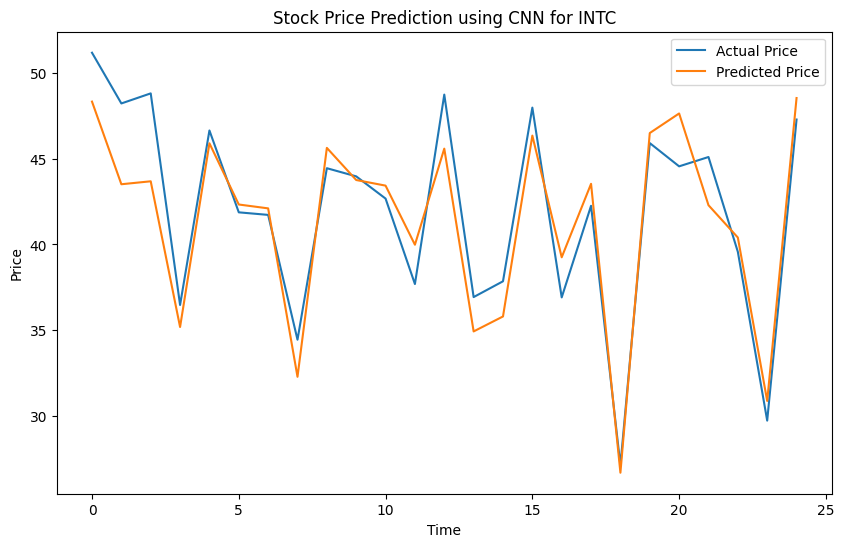

Processing stock: META
Training model for stock: META
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0811 - val_loss: 0.0233
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0190 - val_loss: 0.0141
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - val_loss: 0.0054
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - val_loss: 0.0055
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 - val_loss: 0.0036
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0031
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 13/50
6/6 ━━

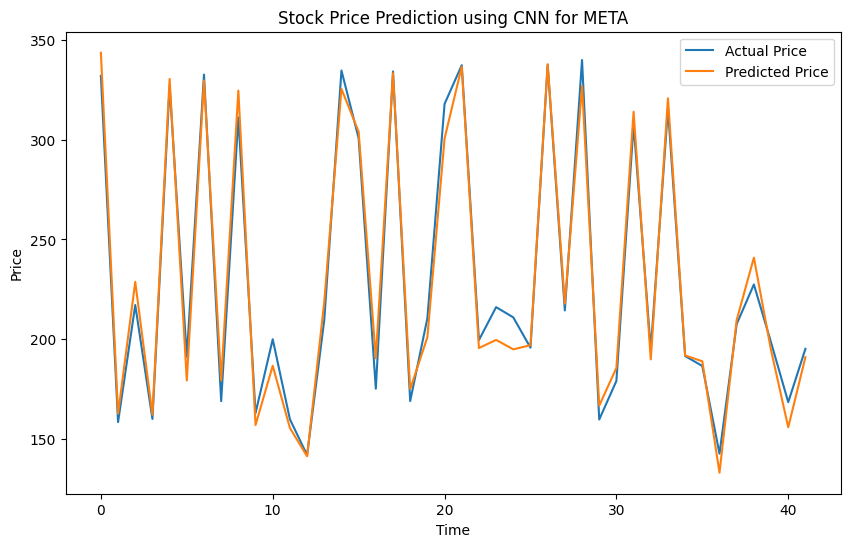

Processing stock: MSFT
Training model for stock: MSFT
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1391 - val_loss: 0.0556
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0450 - val_loss: 0.0203
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0117
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - val_loss: 0.0120
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0116 - val_loss: 0.0097
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - val_loss: 0.0118
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - val_loss: 0.0149
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - val_loss: 0.0099
Epoch 13/50
7/7 ━━━━

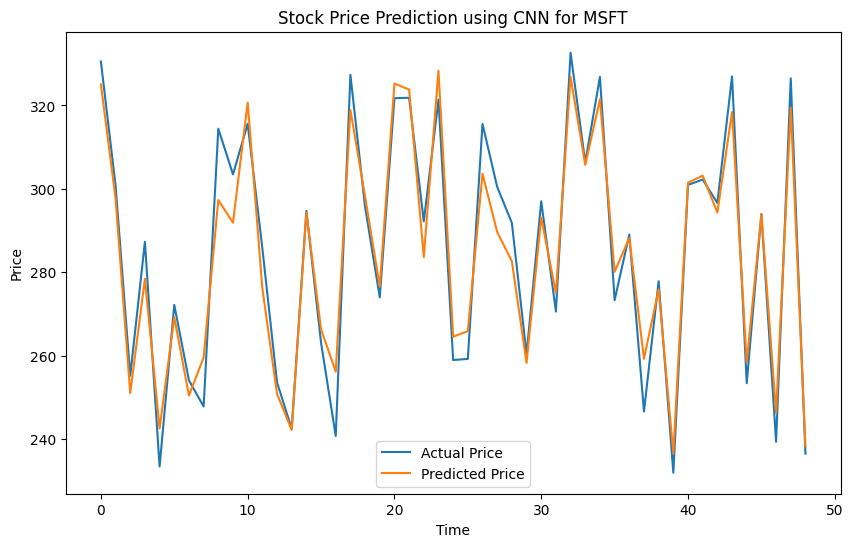

Processing stock: PYPL
Training model for stock: PYPL
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.2163 - val_loss: 0.0228
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0203 - val_loss: 0.0238
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0288 - val_loss: 0.0140
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - val_loss: 0.0060
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0082 - val_loss: 0.0045
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 13/50


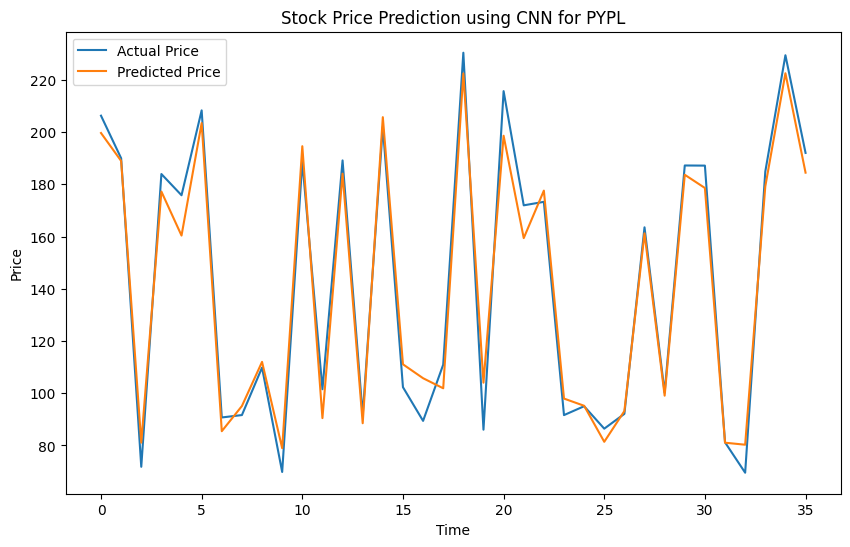

Processing stock: TSLA
Training model for stock: TSLA
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3908 - val_loss: 0.0760
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0775 - val_loss: 0.0256
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0218 - val_loss: 0.0380
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - val_loss: 0.0231
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168 - val_loss: 0.0192
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 - val_loss: 0.0166
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0156 - val_loss: 0.0165
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - val_loss: 0.0160
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0143 - val_loss: 0.0194
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0162 - val_loss: 0.0133
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - val_loss: 0.0135
Epoch 13/50
7/7 ━━━

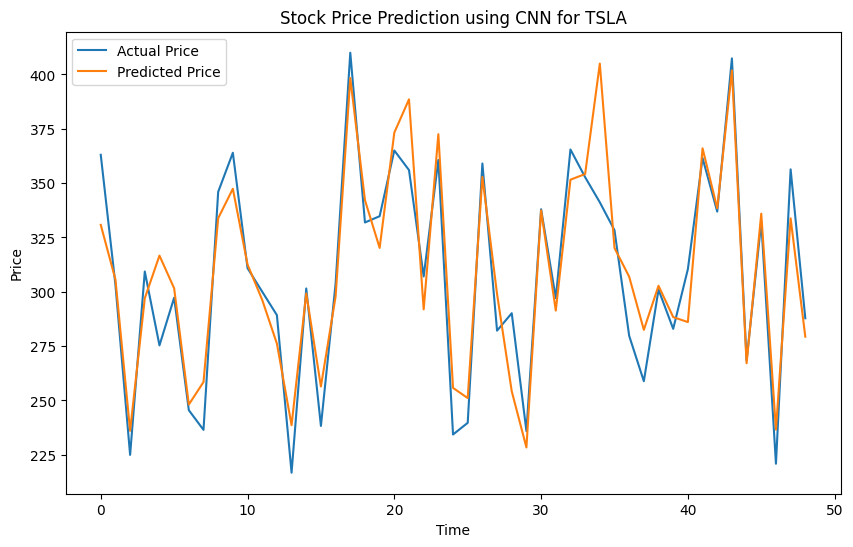

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the dataset
merged_data_path = '/content/Merged_Stock_and_Sentiment_Data.csv'
merged_df = pd.read_csv(merged_data_path)

# Clean and standardize column names
merged_df.columns = merged_df.columns.str.strip().str.lower()

# Group by each stock (e.g., by 'symbol')
grouped_stocks = merged_df.groupby('symbol')

# Iterate through each stock group
for stock_name, stock_data in grouped_stocks:
    print(f"Processing stock: {stock_name}")

    # Filter and select relevant columns
    features = ['average_sentiment', 'open', 'high', 'low', 'volume']  # Input features
    target = 'close'  # Target variable
    stock_data = stock_data[features + [target]].dropna()

    if len(stock_data) < 20:  # Skip if there's not enough data
        print(f"Not enough data for stock {stock_name}. Skipping...")
        continue

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(stock_data)

    # Convert to DataFrame for easier handling
    normalized_df = pd.DataFrame(normalized_data, columns=features + [target])

    # Create sequences for CNN: Define time steps
    timesteps = 10  # Number of previous days to consider for prediction
    X, y = [], []
    for i in range(timesteps, len(normalized_df)):
        X.append(normalized_df.iloc[i-timesteps:i, :-1].values)  # Features for the last `timesteps` days
        y.append(normalized_df.iloc[i, -1])  # Target value (Close price) of the current day

    # Convert to numpy arrays
    X, y = np.array(X), np.array(y)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)  # Predicting the closing price
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    print(f"Training model for stock: {stock_name}")
    history = model.fit(
        X_train, y_train,
        epochs=50,  # Adjust as needed
        batch_size=32,  # Adjust as needed
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss for {stock_name}: {loss}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse scale predictions and actual values for comparison
    y_pred_original = scaler.inverse_transform(
        np.concatenate((np.zeros((y_pred.shape[0], len(features))), y_pred), axis=1)
    )[:, -1]

    y_test_original = scaler.inverse_transform(
        np.concatenate((np.zeros((y_test.shape[0], len(features))), y_test.reshape(-1, 1)), axis=1)
    )[:, -1]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_original, label='Actual Price')
    plt.plot(y_pred_original, label='Predicted Price')
    plt.title(f'Stock Price Prediction using CNN for {stock_name}')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
